# Fast Fourier Transform

__FFT (Fast Fourier Transform) is an efficient algorithm to compute the Discrete Fourier Transform (DFT) of a sequence, which is a transformation that converts a time-domain signal into its frequency-domain representation. The FFT algorithm reduces the number of computations needed to perform the DFT from O(n^2) to O(n*log(n)), making it much faster and more practical for large input sizes. The FFT is widely used in signal processing, image processing, data analysis, and many other applications.__

### sc.fftpack.fft(signal)

__sc.fftpack.fft(signal) is a function call to compute the Fast Fourier Transform (FFT) of the input signal using the SciPy library. FFT is an algorithm used to efficiently compute the Discrete Fourier Transform (DFT) of a sequence, which is a way to represent a signal as a sum of sinusoidal components with different frequencies and amplitudes.__

### np.fft.fftfreq(n, d)

__np.fft.fftfreq returns the Discrete Fourier Transform sample frequencies for the input signal, given the sample rate or frequency sample_freq. It takes two arguments:__

    __n: The number of samples in the input signal.__
    __d: The sample spacing or sample rate of the input signal.__

__The function returns an array of length n, containing the sample frequencies. The values in the array are normalized such that the Nyquist frequency (the maximum frequency that can be represented in the signal) is 0.5.__


### sc.fftpack.ifft

__sc.fftpack.ifft stands for "inverse fast Fourier transform" and it is a function from the SciPy library that performs the inverse operation of sc.fftpack.fft. It transforms a complex signal from the frequency domain back to the time domain.__

__In the filter_signal_scipy function, the sc.fftpack.ifft function is used to transform the modified Fourier coefficients back to the time domain, producing the filtered signal.__

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy as sc
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import seaborn as sns

add_data = "/home/cccr/roxy/matin/MTech_project/data/"

In [2]:
def filter_signal_scipy(signal,sample_freq,ltime_period,htime_period,keep_mean):
    filter_signal=np.zeros(signal.shape)
    if any(np.isnan(signal)):
        raise ValueError('There is NaN in the signal')
    else:
        hf=1./ltime_period
        lf=1./htime_period

        temp_fft = sc.fftpack.fft(signal)

        fftfreq = np.fft.fftfreq(len(signal),sample_freq) ### daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
          
        i1=(np.abs(fftfreq) >= lf) & (np.abs(fftfreq) <= hf)  
        inv_fft=np.zeros(temp_fft.size,dtype=complex)
        inv_fft[i1]=temp_fft[i1]
        if keep_mean:
            inv_fft[0]=temp_fft[0]
        filter_signal= np.real_if_close(sc.fftpack.ifft(inv_fft))
    
    return filter_signal

def norm_anom_var(var):
    mean_var = np.mean(var)
    anom_var = var - mean_var
    std_var = np.std(var)
    norm_anom_var = anom_var / std_var
    return norm_anom_var


In [3]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]
sst = sst.interpolate_na(dim="time")


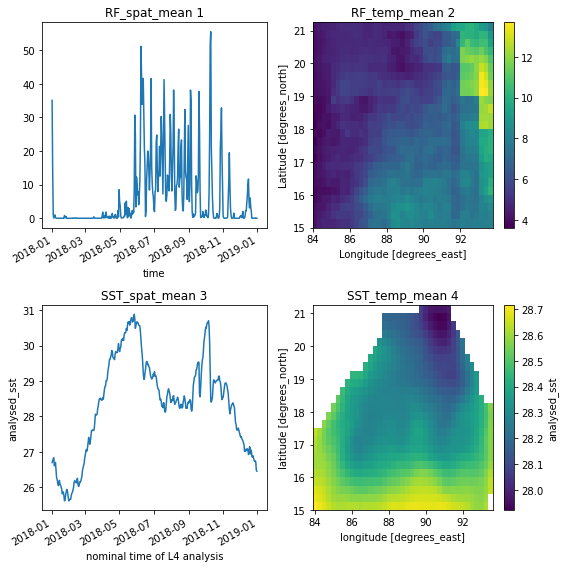

In [14]:
# Load multiple datasets
ds1 = rf[-365:].mean(dim = ['lat','lon'])
ds2 = rf[-365:].mean(dim = ['time'])
ds3 = sst[-365:].mean(dim = ['lat','lon'])
ds4 = sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('RF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('RF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('SST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('SST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


## Normalize

In [29]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]
n_rf = rf
for i in range(0,39):
    for j in range(0,25):
        n_rf[:,j,i] = norm_anom_var(rf[:,j,i])
n_sst = sst        
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])

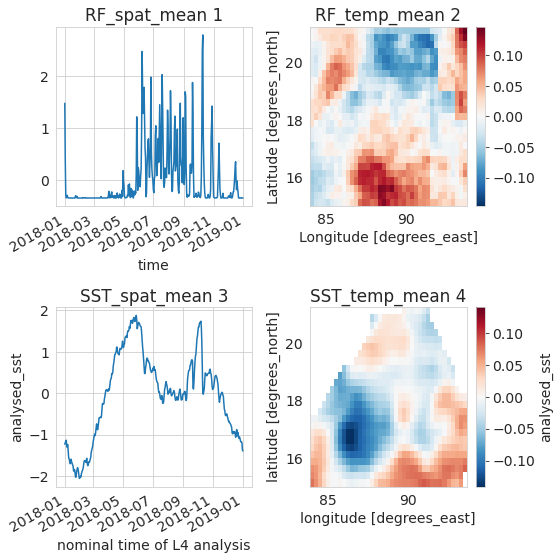

In [30]:
# Load multiple datasets
ds1 = n_rf[-365:].mean(dim = ['lat','lon'])
ds2 = n_rf[-365:].mean(dim = ['time'])
ds3 = n_sst[-365:].mean(dim = ['lat','lon'])
ds4 = n_sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('RF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('RF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('SST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('SST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


## Filtering

In [31]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

sample_freq = 1
ltime_period = 30
htime_period = 60
keep_mean = 0

rainfall = rf
for i in range(0,39):
    for j in range(0,25):
        rainfall[:,j,i] = filter_signal_scipy(rf[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)
filtered_sst = sst
for i in range(0,39):
    for j in range(0,25):
        if any(np.isnan(sst[:,j,i].values)):
            pass
        else:
            filtered_sst[:,j,i] = filter_signal_scipy(sst[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)

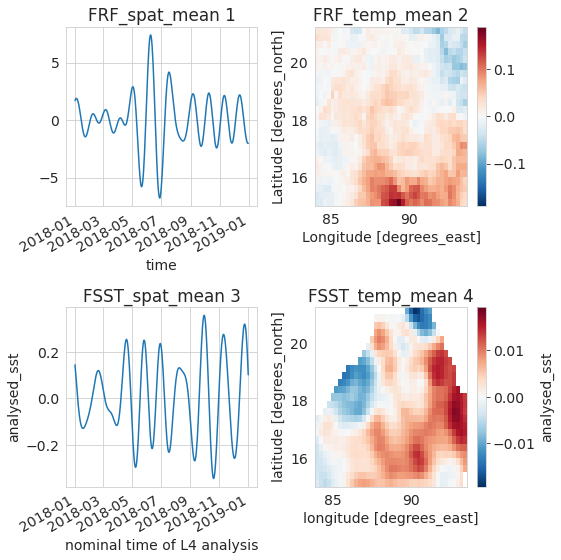

In [32]:
# Load multiple datasets
ds1 = rainfall[-365:].mean(dim = ['lat','lon'])
ds2 = rainfall[-365:].mean(dim = ['time'])
ds3 = filtered_sst[-365:].mean(dim = ['lat','lon'])
ds4 = filtered_sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('FRF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('FRF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('FSST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('FSST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


### Filter_of _normalised

In [41]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

n_rf = rf
for i in range(0,39):
    for j in range(0,25):
        n_rf[:,j,i] = norm_anom_var(rf[:,j,i])
n_sst = sst        
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])


sample_freq = 1
ltime_period = 30
htime_period = 60
keep_mean = 0

filtered_rf = n_rf
for i in range(0,39):
    for j in range(0,25):
        filtered_rf[:,j,i] = filter_signal_scipy(n_rf[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)
filtered_sst = n_sst
for i in range(0,39):
    for j in range(0,25):
        if any(np.isnan(n_sst[:,j,i].values)):
            pass
        else:
            filtered_sst[:,j,i] = filter_signal_scipy(n_sst[:,j,i].values, sample_freq,
                                              ltime_period, htime_period, keep_mean)

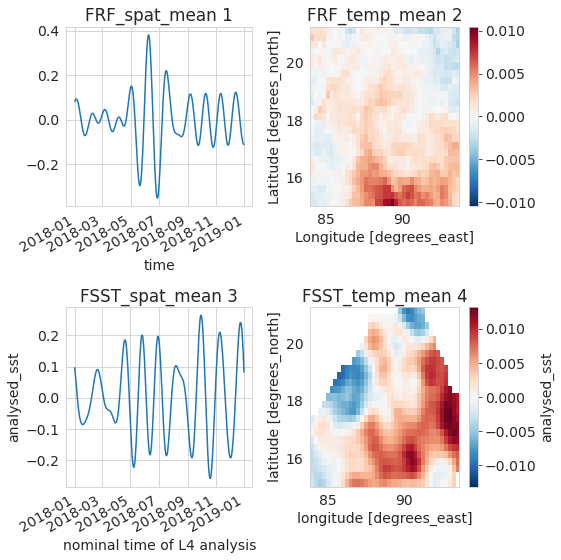

In [34]:
# Load multiple datasets
ds1 = filtered_rf[-365:].mean(dim = ['lat','lon'])
ds2 = filtered_rf[-365:].mean(dim = ['time'])
ds3 = filtered_sst[-365:].mean(dim = ['lat','lon'])
ds4 = filtered_sst[-365:].mean(dim = ['time'])


# Create four subplots in a 2x2 layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first dataset on the first subplot
ds1.plot(ax=axs[0, 0])
axs[0, 0].set_title('FRF_spat_mean 1')

# Plot the second dataset on the second subplot
ds2.plot(ax=axs[0, 1])
axs[0, 1].set_title('FRF_temp_mean 2')

# Plot the third dataset on the third subplot
ds3.plot(ax=axs[1, 0])
axs[1, 0].set_title('FSST_spat_mean 3')

# Plot the fourth dataset on the fourth subplot
ds4.plot(ax=axs[1, 1])
axs[1, 1].set_title('FSST_temp_mean 4')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

# Display the plot
plt.show()


In [17]:
#filter_rainfall = rainfall

In [35]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]


In [36]:
sst_mon = sst.isel(time=sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
rf_mon = rf.isel(time=rf.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
Fsst_mon = filtered_sst.isel(time=filtered_sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
Frf_mon = filtered_rf.isel(time=rainfall.time.dt.month.isin([5, 6, 7, 8, 9, 10]))

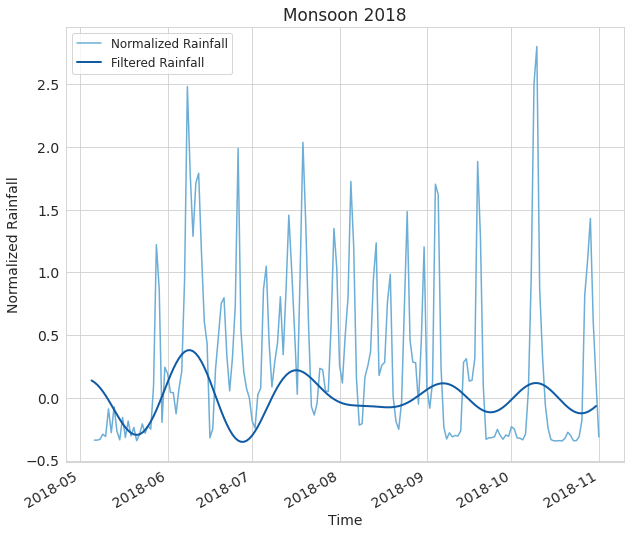

In [37]:

palette = sns.color_palette("Blues_r", n_colors=5)
plt.figure(figsize=[10,8])
sns.set_style("whitegrid")

rainfall_mean = n_rainfall.mean(dim = ['lon', 'lat'])[-240:-60]

xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"]).plot(color = palette[2], label='Normalized Rainfall')

rainfall_mean = Frf_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_rf = xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"])
filtered_rf.plot(color = palette[0], label='Filtered Rainfall', linewidth=2)

x = filtered_rf.time.data
y = filtered_rf.data
above_threshold = y > 1
below_threshold = y < -1
plt.fill_between(x, y, 1, where=above_threshold, color=palette[1], alpha=0.5)
plt.fill_between(x, y, -1, where=below_threshold, color=palette[1], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Normalized Rainfall')
plt.title('Monsoon 2018')

plt.rcParams.update({'font.size': 14})
plt.legend(fontsize=12)

#plt.savefig('rfDry_wetSpell.png', dpi=300)

plt.show()


In [38]:
rf = xr.open_dataarray(add_data + "rfbobmm_daily_1998-2019.nc")[:-30]
rf = rf.interpolate_na(dim="time")
sst = xr.open_dataarray(add_data + "tmpC_sstbob_1998-2020.nc")[:-731]

n_sst = sst
for i in range(0,39):
    for j in range(0,25):
        n_sst[:,j,i] = norm_anom_var(sst[:,j,i])

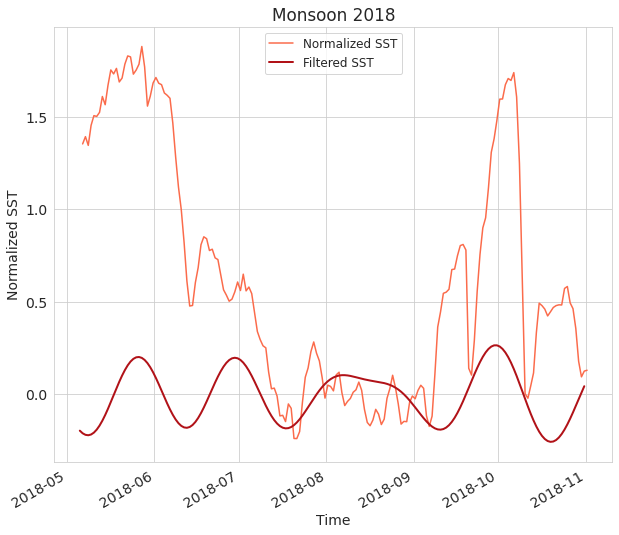

In [39]:

palette = sns.color_palette("Reds_r", n_colors=5)

plt.figure(figsize=[10,8])
sns.set_style("whitegrid")

nsst_mean = n_sst.mean(dim = ['lon', 'lat'])[-240:-60]

xr.DataArray(nsst_mean, coords={"time":nsst_mean.time},dims=["time"]).plot(color = palette[2], label='Normalized SST')

sst_mean = Fsst_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_sst = xr.DataArray(sst_mean, coords={"time":sst_mean.time},dims=["time"])
filtered_sst.plot(color = palette[0], label='Filtered SST', linewidth=2)

x = filtered_sst.time.data
y = filtered_sst.data
above_threshold = y > 1
below_threshold = y < -1
plt.fill_between(x, y, 1, where=above_threshold, color=palette[1], alpha=0.5)
plt.fill_between(x, y, -1, where=below_threshold, color=palette[1], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Normalized SST')
plt.title('Monsoon 2018')

plt.rcParams.update({'font.size': 14})
plt.legend(fontsize=12)

#plt.savefig('sstWarn_coldPhase.png', dpi=300)

plt.show()


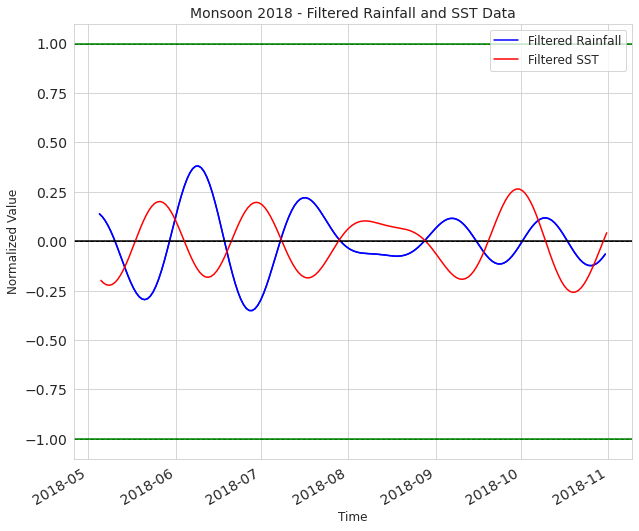

In [40]:
plt.figure(figsize=[10,8])

# Plot filtered rainfall data
rainfall_mean = Frf_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_rf = xr.DataArray(rainfall_mean, coords={"time":rainfall_mean.time},dims=["time"])
x = filtered_rf.time.data
y = filtered_rf.data
filtered_rf.plot(color = 'b', label='Filtered Rainfall')
sns.lineplot(x=x, y=y, color='b')
plt.axhline(y=0, color='black')
plt.axhline(y=1, color='g')
plt.axhline(y=-1, color='g')
above_threshold = y > 1
below_threshold = y < -1
plt.fill_between(x, y, 1, where=above_threshold, color='blue', alpha=0.5)
plt.fill_between(x, y, -1, where=below_threshold, color='red', alpha=0.5)


# Plot filtered SST data
sst_mean = Fsst_mon.mean(dim = ['lon', 'lat'])[-180:]
filtered_sst = xr.DataArray(sst_mean, coords={"time":sst_mean.time},dims=["time"])
x = filtered_sst.time.data
y = filtered_sst.data
filtered_sst.plot(color = 'r', label='Filtered SST')

# Add horizontal lines and fill color between them
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='g', linestyle='--', linewidth=1)
plt.axhline(y=-1, color='g', linestyle='--', linewidth=1)
above_threshold = y > 1
below_threshold = y < -1
plt.fill_between(x, y, 1, where=above_threshold, color='red', alpha=0.5)
plt.fill_between(x, y, -1, where=below_threshold, color='blue', alpha=0.5)

# Set axis labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title("Monsoon 2018 - Filtered Rainfall and SST Data", fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add gridlines
plt.grid(True)

# Save figure
#plt.savefig("CombinedSSTRF.png")


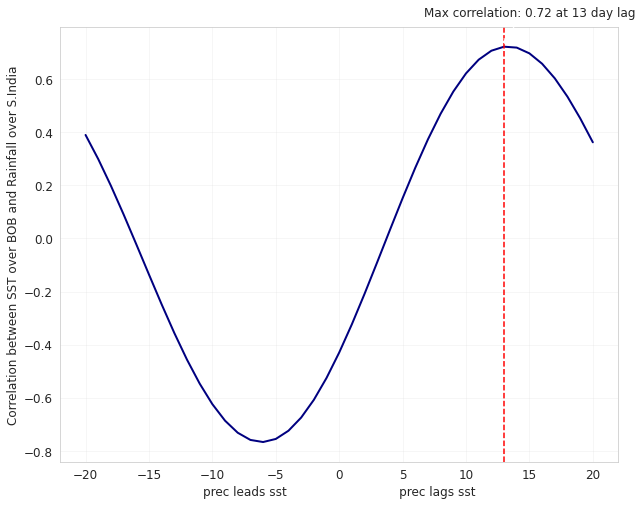

In [51]:
def corr(rainfall, filtered_sst, lag_days):
    filter_rf_box = rainfall[365:-365+lag_days,:,:]
    filter_rf_box_mean = filter_rf_box.mean(dim = ['lon', 'lat'])
    filter_sst_box = filtered_sst[365-lag_days:-365,:,:]
    filter_sst_box_mean = filter_sst_box.mean(dim = ['lat', 'lon'])
    return np.corrcoef(filter_rf_box_mean,filter_sst_box_mean )[0][1]
    
# Calculate correlations for different lags
lags = range(-20, 21)
corrs = [corr(filtered_rf, filtered_sst, lag) for lag in lags]

# Find the lag with maximum correlation
max_corr = max(corrs)
max_lag = lags[corrs.index(max_corr)]

# Plot the correlations
plt.figure(figsize=[10,8])
plt.plot(lags, corrs, linewidth=2, color='navy')
plt.axvline(x=max_lag, color='red', linestyle='--')
plt.annotate(f"Max correlation: {max_corr:.2f} at {max_lag} day lag", 
             xy=(max_lag, max_corr), xycoords='data',
             xytext=(-80, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"),
             fontsize=12)
plt.xlabel("prec leads sst                             prec lags sst", fontsize=12)
plt.ylabel("Correlation between SST over BOB and Rainfall over S.India", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.2)
#plt.savefig("BOBCorrBOByr.png")
plt.show()

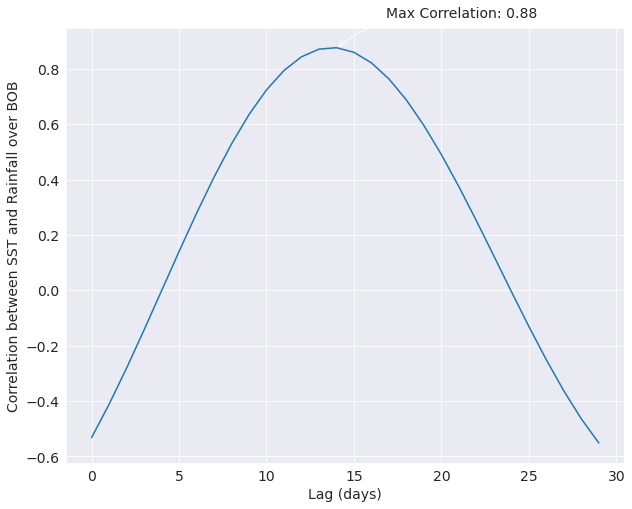

In [52]:
import seaborn as sns

# Function to calculate correlation between rainfall and filtered SST
def corr(rainfall, filtered_sst, lag_days):
    Fsst_mon = filtered_sst.isel(time=filtered_sst.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
    Frf_mon = rainfall.isel(time=rainfall.time.dt.month.isin([5, 6, 7, 8, 9, 10]))
    Fsst_meam = Fsst_mon.mean(dim = ['lon', 'lat'])
    Frf_meam = Frf_mon.mean(dim = ['lon', 'lat'])
    Csst = []
    for i in range(0,3864,184):
        Csst.extend(Fsst_meam[31-lag_days+i:153-lag_days+i].data)
    Crf = []
    for i in range(0,3864,184):
        Crf.extend(Frf_meam[31+i:153+i].data)

    return np.corrcoef(Csst, Crf)[0][1]

# Calculate correlation for various lag days
corrs = [corr(filtered_rf, filtered_sst, i) for i in range(0,30)]

# Plot the results using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=[10,8])
sns.lineplot(x=range(0,30), y=corrs)
plt.xlabel("Lag (days)")
plt.ylabel("Correlation between SST and Rainfall over BOB")
#plt.title("Correlation between SST and Rainfall over BOB for various lag days")
plt.annotate(f"Max Correlation: {max(corrs):.2f}", xy=(np.argmax(corrs), max(corrs)), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))
#plt.savefig("BOBCorrjjas.png")
plt.show()